<a href="https://colab.research.google.com/github/valeryefim/MLforDS/blob/zad1/indtask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка среды разработки

In [ ]:
!pip install category_encoders > None

In [ ]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Описание датасета "Sleep, Health, and Lifestyle"


Этот набор данных, содержащий 373 строки и 13 столбцов, предоставляет информацию о различных аспектах, описывающих лайфстайл человека.

- Person ID: A unique identifier for each participant.
- Gender: The participant's gender (Male/Female).
- Age: The participant's age in years.
- Occupation: The job or career of the participant.
- Sleep Duration (hours): The daily sleep duration of the participant in hours.
- Quality of Sleep (scale: 1-10): A subjective assessment of sleep quality on a scale from 1 to 10.
- Physical Activity Level (minutes/day): The daily duration of physical activity for the participant, measured in minutes.
- Stress Level (scale: 1-10): A subjective assessment of the participant's stress level on a scale from 1 to 10.
- BMI Category: The participant's BMI classification (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The participant's blood pressure, represented as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The participant's resting heart rate, measured in beats per minute.
- Daily Steps: The number of steps the participant takes each day.
- Sleep Disorder: The presence or absence of a sleep disorder in the participant (None, Insomnia, Sleep Apnea).

In [ ]:
# загружаем датасет
data = pd.read_csv("/content/ss.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Target-переменной для нашей модели станец признак "Качество сна" ("Quality of Sleep").

# Проведем предобработку данных и EDA перед тем, как начать обучение

In [ ]:
# проведем кодирование столбцов "Gender" и "BMI Category" методом Label encoding.
# Для этого воспользуемся методом из библиотеки sklearn
for col in ["Gender", "BMI Category"]:
  le = LabelEncoder()
  le.fit(data[col])
  data[col + "_encoded"] = le.transform(data[col])
  # удалим старые столбцы
  data.drop(columns=[col], inplace=True)
data

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_encoded,BMI Category_encoded
0,1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,None,1,3
1,2,28,Doctor,6.2,6,60,8,125/80,75,10000,None,1,0
2,3,28,Doctor,6.2,6,60,8,125/80,75,10000,None,1,0
3,4,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,2
4,5,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3
369,370,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3
370,371,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Apnea,0,3
371,372,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,0,3


In [ ]:
# разделим столбец "Blood Pressure" на два: верхнее давление и нижнее, чтобы эти параметры воспринимались алгоритмами как числа, а не строки
pressure_df = data['Blood Pressure'].str.split('/', expand=True)
pressure_df = pressure_df.rename({0: 'Blood Pressure Upper', 1:'Blood Pressure Lower'}, axis = 1)
pressure_df

,Blood Pressure Upper,Blood Pressure Lower
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
...,...,...
368,140,95
369,140,95
370,140,95
371,140,95


In [ ]:
# добавим новые столбцы в датасет и удалим старый столбец
data = data.join(pressure_df)
data = data.drop(["Blood Pressure", "Sleep Disorder", "Person ID"],  axis = 1)
data

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,BMI Category_encoded,Blood Pressure Upper,Blood Pressure Lower
0,27,Software Engineer,6.1,6,42,6,77,4200,1,3,126,83
1,28,Doctor,6.2,6,60,8,75,10000,1,0,125,80
2,28,Doctor,6.2,6,60,8,75,10000,1,0,125,80
3,28,Sales Representative,5.9,4,30,8,85,3000,1,2,140,90
4,28,Sales Representative,5.9,4,30,8,85,3000,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
368,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95
369,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95
370,59,Nurse,8.0,9,75,3,68,7000,0,3,140,95
371,59,Nurse,8.1,9,75,3,68,7000,0,3,140,95


In [ ]:
# с помощью метода Binary encoding проведем кодирование столбца с профессиями.
# в данном случае Label encoding нам бы не подошел, так как создал бы иерархию между профессиями
enc = BinaryEncoder(cols=["Occupation"])
data = enc.fit_transform(data)
data

,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_encoded,BMI Category_encoded,Blood Pressure Upper,Blood Pressure Lower
0,27,0,0,0,1,6.1,6,42,6,77,4200,1,3,126,83
1,28,0,0,1,0,6.2,6,60,8,75,10000,1,0,125,80
2,28,0,0,1,0,6.2,6,60,8,75,10000,1,0,125,80
3,28,0,0,1,1,5.9,4,30,8,85,3000,1,2,140,90
4,28,0,0,1,1,5.9,4,30,8,85,3000,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95
369,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95
370,59,0,1,0,1,8.0,9,75,3,68,7000,0,3,140,95
371,59,0,1,0,1,8.1,9,75,3,68,7000,0,3,140,95


In [ ]:
# проверим наличие nan-значений в датасете и в случае необходимости избавимся от них
data.isna().sum()

Age                        0
Occupation_0               0
Occupation_1               0
Occupation_2               0
Occupation_3               0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
Gender_encoded             0
BMI Category_encoded       0
Blood Pressure Upper       0
Blood Pressure Lower       0
dtype: int64

Построим корреляционную матрицу, чтобы понять, какие столбцы сильно коррелируют друг с другом и могут помешать качественному обучению модели

<ipython-input-11-6f9d5aa8ece8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

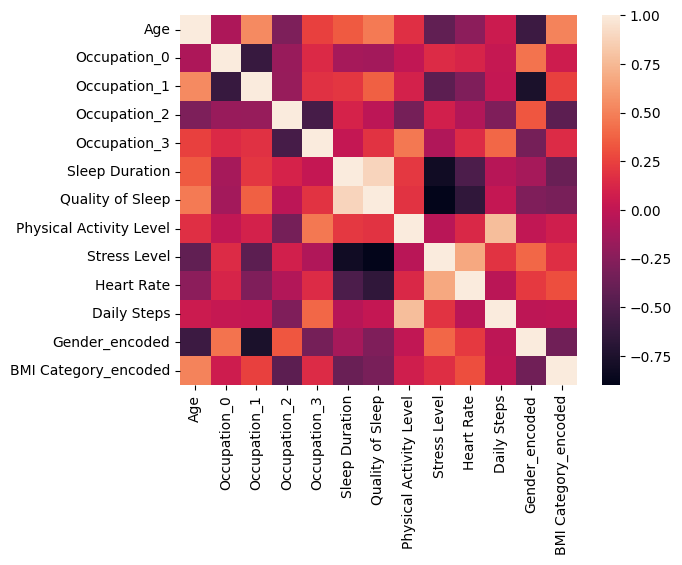

In [ ]:
corr = data.corr()
sns.heatmap(corr)

Столбец "Quality of Sleep" сильно зависит от признаков "Stress Level" и "Sleep Duration". Попробуем построить модель и проверить, как наличие данных признаков повлияет на ее качество.

# Выбор модели и ее обучение

Для прогнозирования признака "Качество сна" нам подойдет модель линейной регрессии.

In [ ]:
# делим выборку на тестовую и train
X, y = data.drop("Quality of Sleep", axis=1), data["Quality of Sleep"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [ ]:
# обучим модель линейной регрессии и получим предсказанные ею значения
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
predictions

array([6.07878631, 7.86859124, 8.1842396 , 5.77050399, 8.15129187,
       7.91066237, 8.16105375, 7.10333994, 6.06086816, 9.06416393,
       6.07878631, 8.98002167, 7.82658224, 8.14004925, 7.82652012,
       7.10340206, 5.32379218, 8.02514061, 6.03986365, 7.91066237,
       5.85458413, 5.77050399, 7.15242519, 7.14541107, 8.24513389,
       5.812513  , 8.9145519 , 6.03671518, 7.15608795, 6.0577818 ,
       7.12440657, 5.72843287, 8.9145519 , 6.0577818 , 5.85458413,
       6.03986365, 9.08516843, 8.18852408, 5.77050399, 8.99863204,
       8.10922075, 7.04727843, 8.99863204, 7.73345823, 8.00388882,
       5.80816541, 7.13142068, 7.86859124, 7.10333994, 5.80816541,
       8.00388882, 8.14004925, 7.91066237, 9.10617293, 6.03986365,
       6.70448945, 8.10922075, 8.1567025 , 6.03986365, 8.10922075,
       7.08934955, 4.3281576 , 5.80816541, 8.87248077, 9.10617293,
       7.12440657, 9.01963654, 8.15129187, 8.99863204, 6.68713357,
       9.06416393, 6.70448945, 5.51601735, 7.10333994, 7.06133

Проведем анализ получившихся результатов

In [ ]:
# воспользуемся метрикой СКО. Она хорошо сработает в нашем случае, так как значения целевой переменной
# не очень большие => не будет больших квадратов
MSE = mean_squared_error(y_test, predictions)
MSE

0.038818553685586024

Как итог, точность прездсказаний нашей модели получилась около 96%, что очень неплохо!